In [1]:
# ! pip install simple-colors
# ! pip install neattext
# ! pip install emoji 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from emoji import demojize
import neattext.functions as nfx
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import  wordnet
from nltk.stem import WordNetLemmatizer, LancasterStemmer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from sklearn import mixture
import sys
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from sklearn.metrics import cohen_kappa_score
from scipy.sparse import csr_matrix
import scipy.cluster.hierarchy as sch
from sklearn.manifold import TSNE
from gensim.test.utils import get_tmpfile
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts
import re
from nltk.corpus import wordnet
from random import randrange
import random
import spacy

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esraa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esraa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\esraa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Models building

## Emotions dataset

Loading dataset files into dataframes

In [3]:
colnames=['text','emotions']
Emotion_train=pd.read_csv("./content/train.txt",header=None,names=colnames,sep=';')
Emotion_validation= pd.read_csv("./content/val.txt",header=None,names=colnames,sep=';')
Emotion_test=pd.read_csv("./content/test.txt",header=None,names=colnames,sep=';')
Emotion_train.head()


,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Dataset Exploration

Check na values count

In [4]:
print(f'training set na values count: {str(Emotion_train.isna().sum().sum())}')
print(f'validation set na values count: {str(Emotion_validation.isna().sum().sum())}')
print(f'testing set na values count: {str(Emotion_test.isna().sum().sum())}')

training set na values count: 0
validation set na values count: 0
testing set na values count: 0


Since the basic human emotions include (joy,sadness,fear,anger,disgust,surprise), since love is not included it will be discarded.

In [5]:
Emotion_train.drop(Emotion_train.index[Emotion_train['emotions'] == 'love'], inplace=True)
Emotion_train['emotions'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
surprise     572
Name: emotions, dtype: int64

In [6]:
Emotion_validation.drop(Emotion_validation.index[Emotion_validation['emotions'] == 'love'], inplace=True)
Emotion_validation['emotions'].value_counts()

joy         704
sadness     550
anger       275
fear        212
surprise     81
Name: emotions, dtype: int64

In [7]:
Emotion_test.drop(Emotion_test.index[Emotion_test['emotions'] == 'love'], inplace=True)
Emotion_test['emotions'].value_counts()

joy         695
sadness     581
anger       275
fear        224
surprise     66
Name: emotions, dtype: int64

Encoding emotions column

In [8]:
#labels_dict = {0:'sadness', 1:'joy', 3:'anger', 4:'fear', 5:'surprise'}
emo_labels_dict = {'sadness':0, 'joy':1, 'anger':2, 'fear':3, 'surprise':4}
labels_emo_dict = {v: k for k, v in emo_labels_dict.items()}

Emotion_train['label'] = Emotion_train['emotions'].map(emo_labels_dict )
Emotion_train

,text,emotions,label
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,2
4,i am feeling grouchy,anger,2
5,ive been feeling a little burdened lately wasn...,sadness,0
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,0
15996,i am now turning and i feel pathetic that i am...,sadness,0
15997,i feel strong and good overall,joy,1
15998,i feel like this was such a rude comment and i...,anger,2


In [9]:
Emotion_validation['label'] = Emotion_validation['emotions'].map(emo_labels_dict)
Emotion_validation

,text,emotions,label
0,im feeling quite sad and sorry for myself but ...,sadness,0
1,i feel like i am still looking at a blank canv...,sadness,0
3,i am just feeling cranky and blue,anger,2
4,i can have for a treat or if i am feeling festive,joy,1
5,i start to feel more appreciative of what god ...,joy,1
...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,0
1996,i constantly worry about their fight against n...,joy,1
1997,i feel its important to share this info for th...,joy,1
1998,i truly feel that if you are passionate enough...,joy,1


In [10]:
Emotion_test['label'] = Emotion_test['emotions'].map(emo_labels_dict )
Emotion_test

,text,emotions,label
0,im feeling rather rotten so im not very ambiti...,sadness,0
1,im updating my blog because i feel shitty,sadness,0
2,i never make her separate from me because i do...,sadness,0
3,i left with my bouquet of red and yellow tulip...,joy,1
4,i was feeling a little vain when i did this one,sadness,0
...,...,...,...
1995,i just keep feeling like someone is being unki...,anger,2
1996,im feeling a little cranky negative after this...,anger,2
1997,i feel that i am useful to my people and that ...,joy,1
1998,im feeling more comfortable with derby i feel ...,joy,1


### Data visualization

**Distribution of the emotions in the training set**

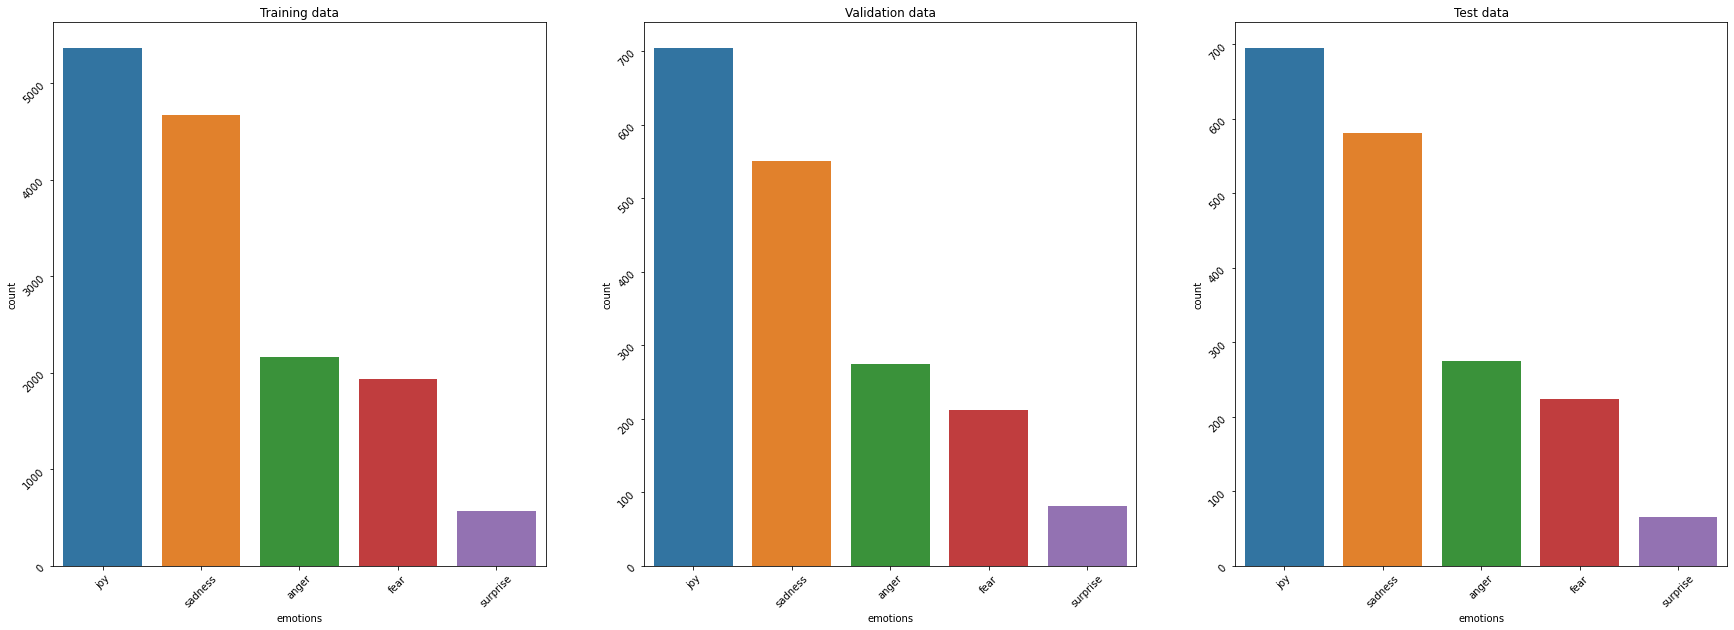

In [11]:
all_data = {'Training data': Emotion_train, 'Validation data': Emotion_validation, 'Test data': Emotion_test}
fig, ax = plt.subplots(1,3, figsize=(30,10))
for (i,df),key in zip(enumerate(all_data.values()),list(all_data)):
    data = df.copy()
    sns.countplot(x=data['emotions'],order = data['emotions'].value_counts(normalize=True).index,ax=ax[i])
    ax[i].set(title=key)
    ax[i].tick_params(labelrotation=45)
plt.show()

All the emotions have equal number of classes in train, validation and test. but the classes distribution itself is unbalanced.

**checking text length of every emotion**

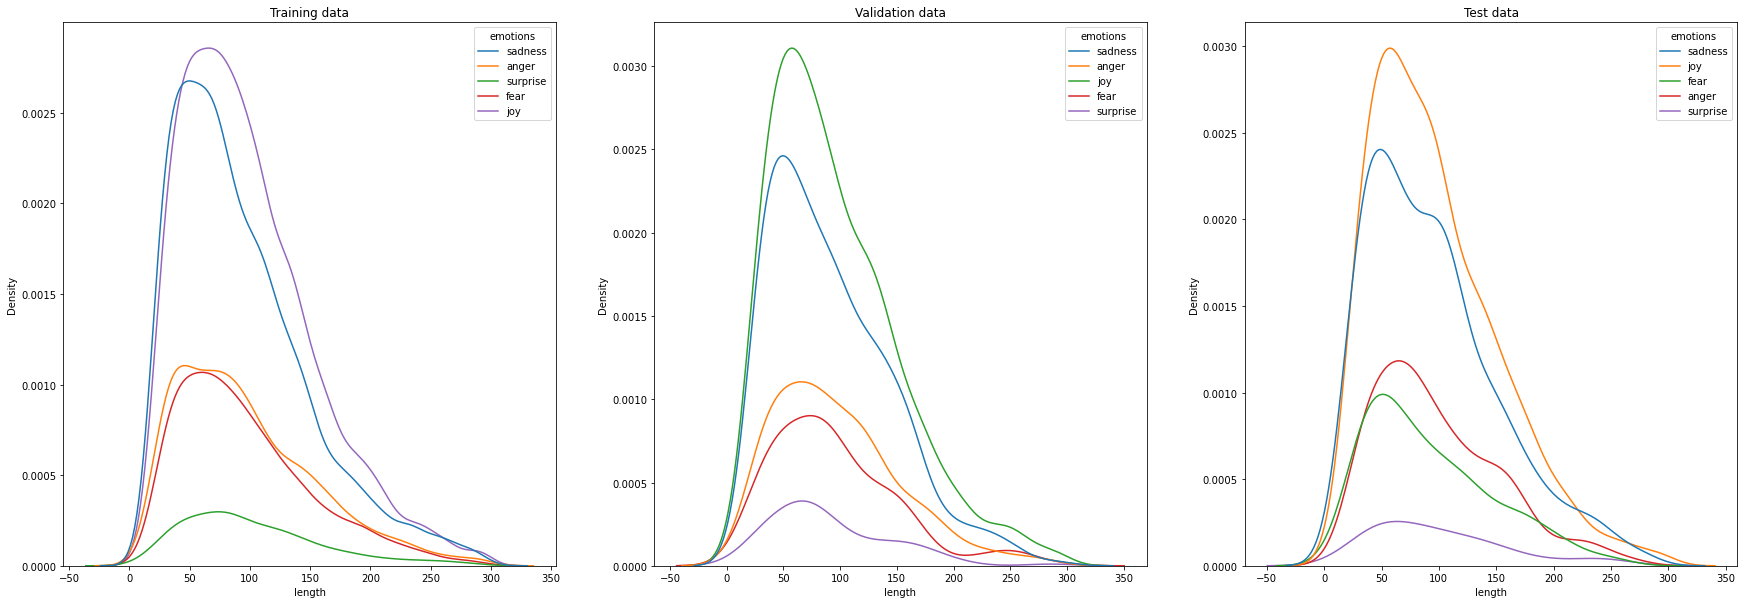

In [12]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
for (i,df),key in zip(enumerate(all_data.values()),list(all_data)):
    data = df.copy()
    data['length'] = [len(x) for x in data['text']]
    sns.kdeplot(data=data,x='length',hue='emotions', ax=ax[i])
    ax[i].set(title=key)

plt.show()

Nearly all the text length has the same value for all the classes and across different dataset partitions.

**Wordcloud for every emotion in training set**

In [13]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(5, 5))
    plt.title(df+' Word Cloud', size = 10)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

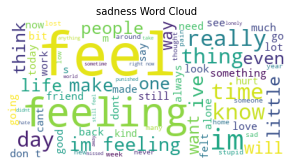

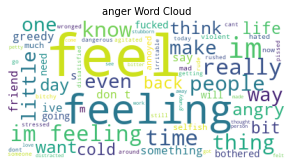

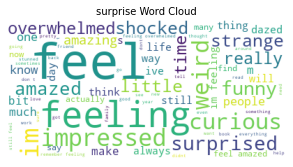

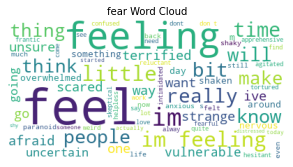

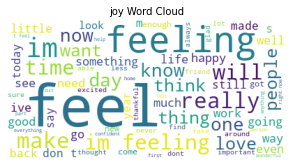

In [14]:
emotions_list = Emotion_train['emotions'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in Emotion_train.loc[Emotion_train['emotions'] == emotion,'text']])
    wordcloud = WordCloud(background_color ='white',max_words=75).generate(text)
    words_cloud(wordcloud, emotion)

It can be seen that some words like (feeling, feel) are repeated in almost all emotions word clouds, but these words won't help in classification of emotions

**N Gram for training set**

In [15]:

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [16]:
def plot_emotions_ngrams(emotions_list,df,text_col_name):
    for idx,emotion_name in enumerate(emotions_list):
        fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
        #selecting emotion text
        emotion_text = df[df['emotions']==emotion_name][text_col_name]
        emotion_unigrams = get_top_n_gram(emotion_text.values,(1,1),7)[2:]
        emotion_bigrams = get_top_n_gram(emotion_text.values,(2,2),7)[2:]
        emotion_trigrams = get_top_n_gram(emotion_text.values,(3,3),7)[2:]
        fig.suptitle(f'Emotion : {emotion_name}')
        sns.barplot( x=list(dict(emotion_unigrams).keys()), y=list(dict(emotion_unigrams).values()),ax=axes[0])
        axes[0].set_title('Unigrams')
        axes[0].tick_params(labelrotation=45)

        sns.barplot( x=list(dict(emotion_bigrams).keys()), y=list(dict(emotion_bigrams).values()),ax=axes[1])
        axes[1].set_title('Bigrams')
        axes[1].tick_params(labelrotation=45)

        sns.barplot( x=list(dict(emotion_trigrams).keys()), y=list(dict(emotion_trigrams).values()),ax=axes[2])
        axes[2].set_title('Trigrams')
        axes[2].tick_params(labelrotation=45)



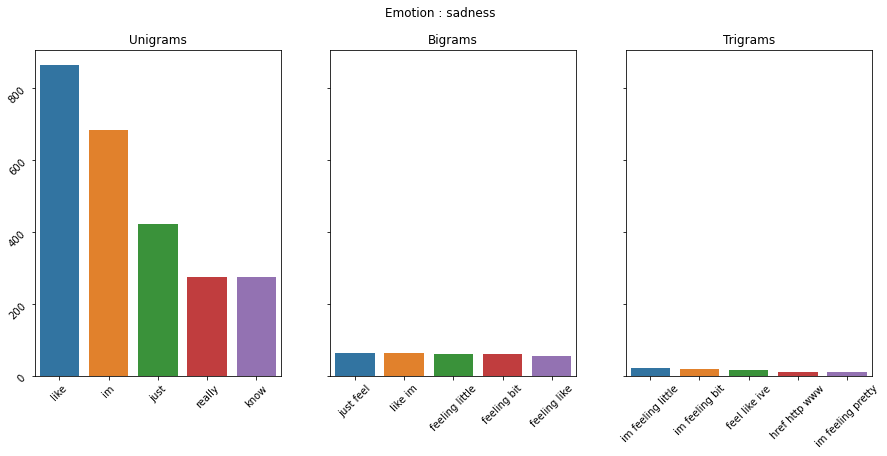

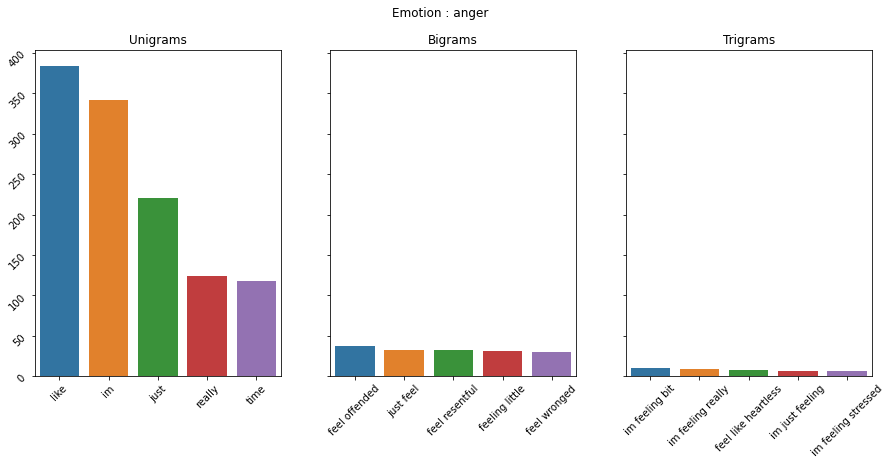

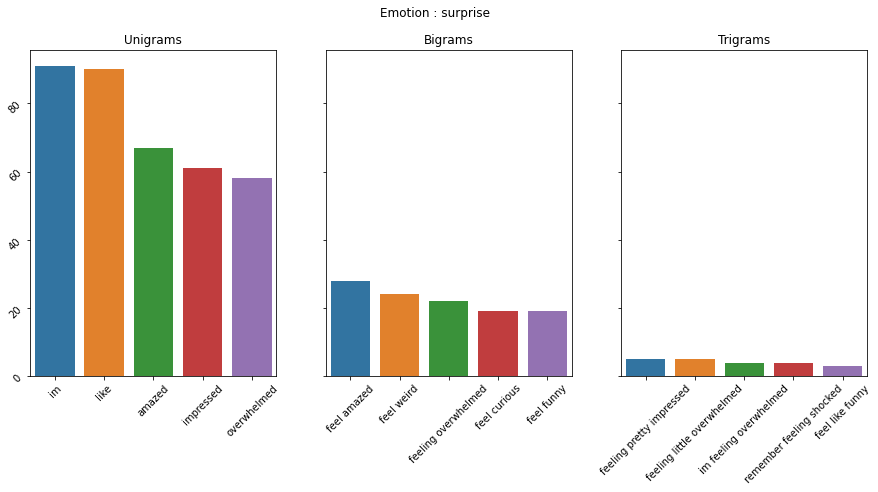

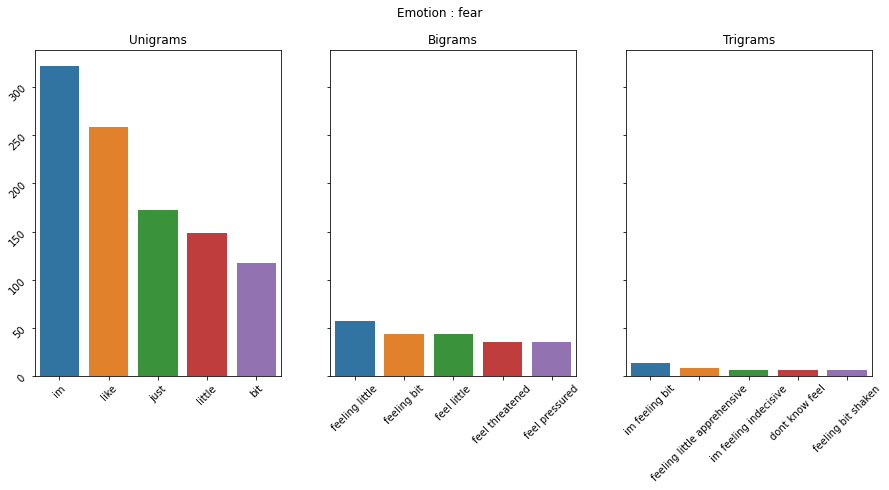

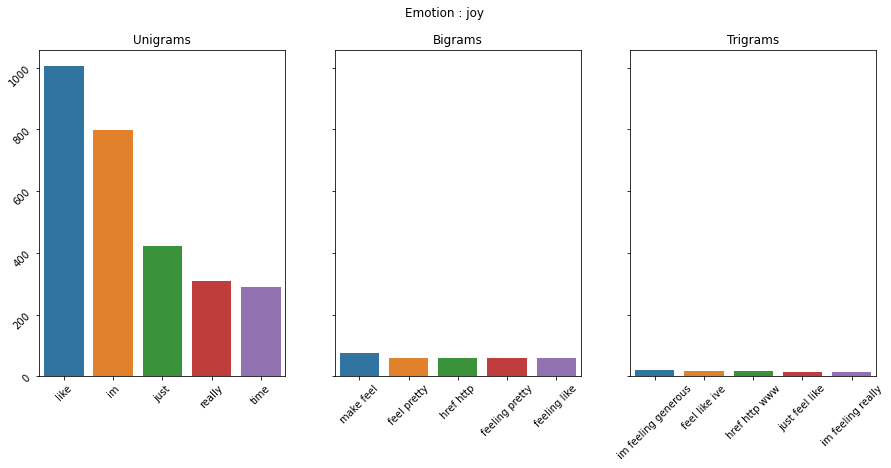

In [17]:
plot_emotions_ngrams(emotions_list,Emotion_train,'text')

### Data preparation

In [18]:
def prepare_text(text,filter_stopwords=False):
    clean_text=text
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    wordnet_map={"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    pos_tagged_text = nltk.pos_tag(clean_text.split())
    clean_text = " ".join([lemmatizer.lemmatize(word , wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
    
    # remove puntuation
    punc_to_remove = string.punctuation
    clean_text = clean_text.translate(str.maketrans('','', punc_to_remove))
    
    # remove stopwords
    stopwords_lst = set(stopwords.words("english"))
    if filter_stopwords:
        remove_list = ['no','not']
        stopwords_lst = [i for i in stopwords_lst if i not in remove_list]

    clean_text = " ".join([word for word in str(clean_text).split() if word not in stopwords_lst])
    
    # remove most common words but not carrying much meaning, these words were noticed from previous visualizations 
    unwanted_words = ["ive","amp","gonna","im","lol","nd","youre","would","want","thats","www","http","href", "there","still","wanna","just","like","really","live","also","could","didnt","he","youre","do","let","yall","make","know","thing","time","say","ur", "bb", "bc", "id", "wanna", "get","feel","feeling",'felt']
    clean_text = " ".join([word for word in str(clean_text).split() if word not in unwanted_words])
    
    return clean_text


**Training data**

In [19]:
Emotion_train["cleantext"] = Emotion_train["text"].apply(lambda text: prepare_text(text))
Emotion_train.head()

,text,emotions,label,cleantext
0,i didnt feel humiliated,sadness,0,humiliate
1,i can go from feeling so hopeless to so damned...,sadness,0,go hopeless damned hopeful around someone care...
2,im grabbing a minute to post i feel greedy wrong,anger,2,grab minute post greedy wrong
4,i am feeling grouchy,anger,2,grouchy
5,ive been feeling a little burdened lately wasn...,sadness,0,little burdened lately wasnt sure


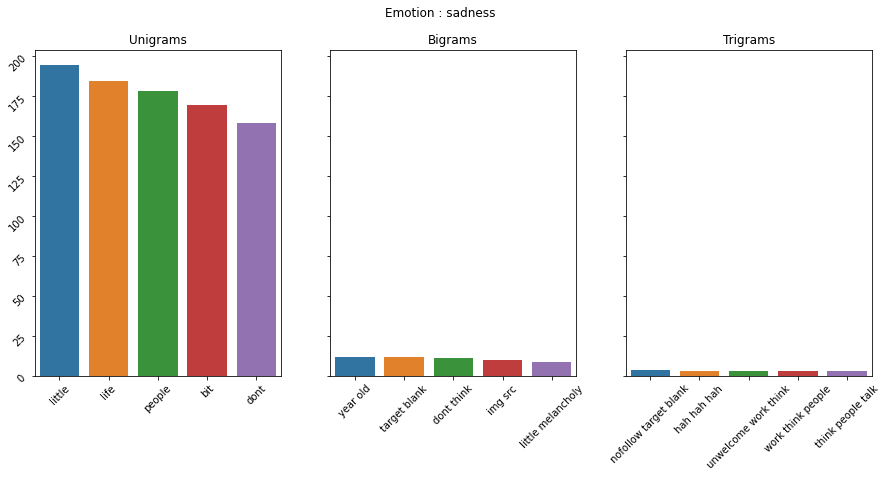

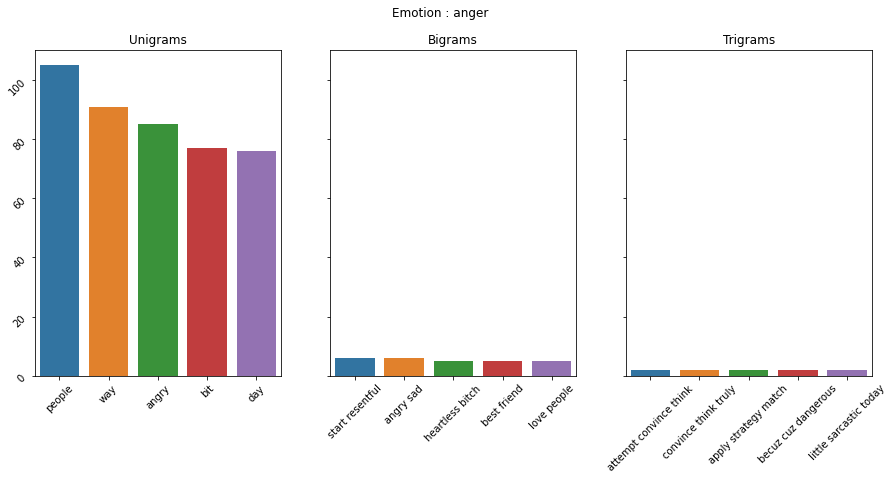

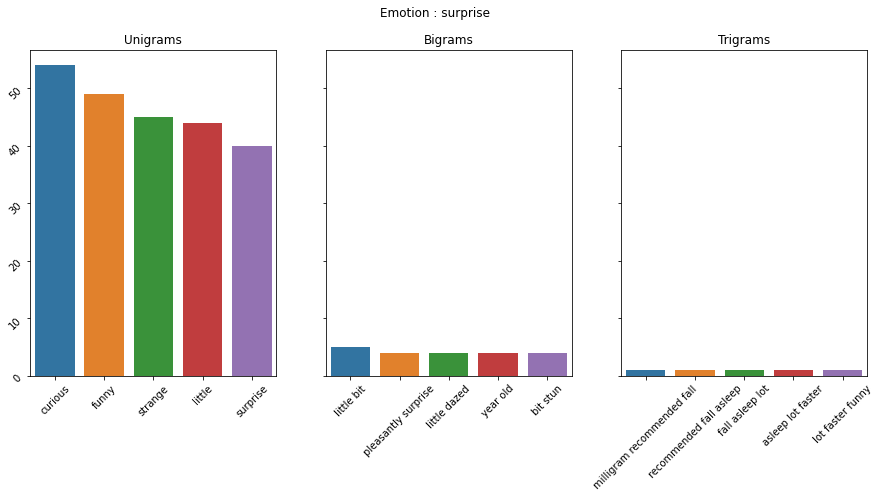

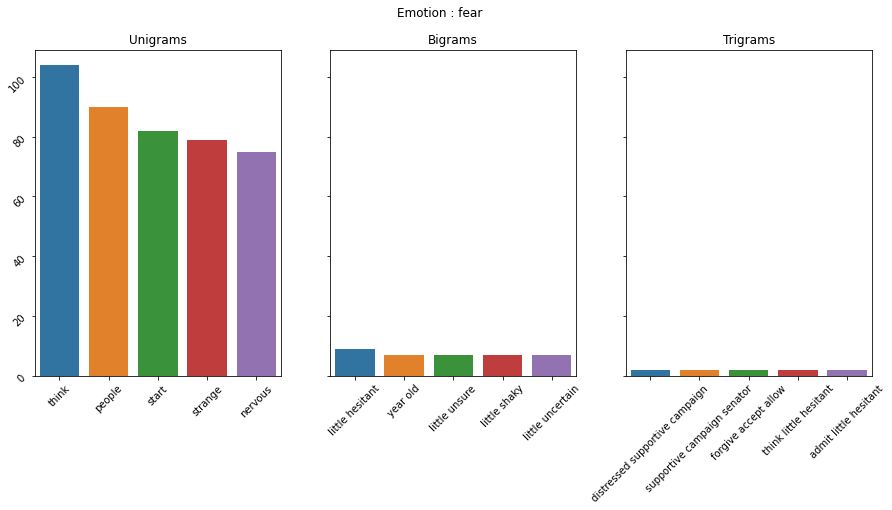

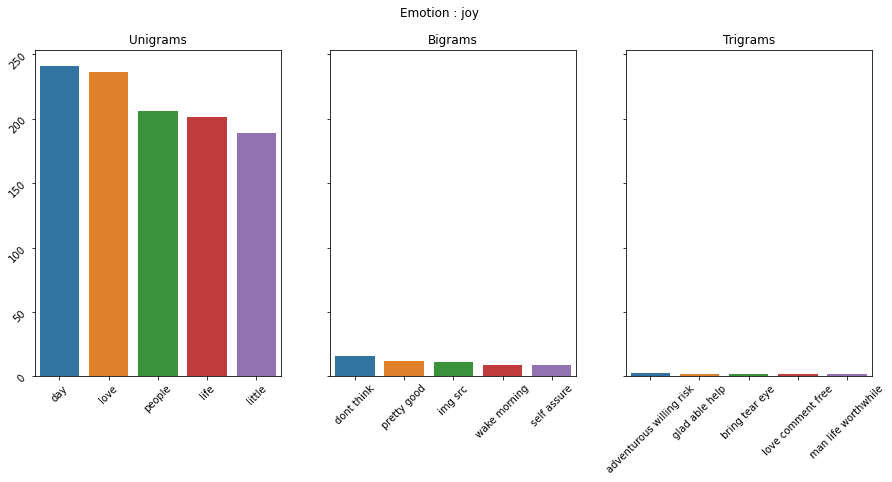

In [20]:
plot_emotions_ngrams(emotions_list,Emotion_train,'cleantext')

**Validation data**

In [21]:
Emotion_validation["cleantext"] = Emotion_validation["text"].apply(lambda text: prepare_text(text))
Emotion_validation.head()

,text,emotions,label,cleantext
0,im feeling quite sad and sorry for myself but ...,sadness,0,quite sad sorry ill snap soon
1,i feel like i am still looking at a blank canv...,sadness,0,look blank canvas blank piece paper
3,i am just feeling cranky and blue,anger,2,cranky blue
4,i can have for a treat or if i am feeling festive,joy,1,treat festive
5,i start to feel more appreciative of what god ...,joy,1,start appreciative god


**Testing data**

In [22]:
Emotion_test["cleantext"] = Emotion_test["text"].apply(lambda text: prepare_text(text))
Emotion_test.head()

,text,emotions,label,cleantext
0,im feeling rather rotten so im not very ambiti...,sadness,0,rather rotten ambitious right
1,im updating my blog because i feel shitty,sadness,0,update blog shitty
2,i never make her separate from me because i do...,sadness,0,never separate ever ashamed
3,i left with my bouquet of red and yellow tulip...,joy,1,leave bouquet red yellow tulip arm slightly op...
4,i was feeling a little vain when i did this one,sadness,0,little vain one


In [23]:
x_train = Emotion_train["cleantext"]
y_train = Emotion_train["label"]

x_val = Emotion_validation["cleantext"]
y_val = Emotion_validation["label"]

x_test =Emotion_test["cleantext"]
y_test =Emotion_test["label"]

### Feature Extraction

#### TF-IDF

In [24]:
count_vect = CountVectorizer(min_df=20,ngram_range=(1,2))
emotion_count = count_vect.fit_transform(x_train)
tokens= count_vect.get_feature_names()
index_names = ['Part{:d}'.format(idx) for idx, _ in enumerate(emotion_count)]
df = pd.DataFrame(data=emotion_count.toarray(), index=index_names, columns=tokens)
display(df)

C:\Users\esraa\anaconda3\envs\NLP_PY_3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability,able,absolutely,abuse,accept,acceptable,accomplish,ache,achieve,across,...,write,writer,writing,wrong,year,year old,yes,yesterday,yet,young
Part0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Part1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Part2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Part3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Part4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Part14691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Part14692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Part14693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Part14694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
tf_transformer = TfidfTransformer(use_idf=True).fit(emotion_count)
emotion_tf = tf_transformer.transform(emotion_count)
emotion_tf.toarray()
df_idf = pd.DataFrame(tf_transformer.idf_, index=tokens,columns=["idf_weights"])
display(df_idf['idf_weights'].nlargest(n=1000))

activity      7.550876
badly         7.550876
bouncy        7.550876
confidence    7.550876
cross         7.550876
                ...   
world         5.353652
actually      5.343125
many          5.343125
person        5.343125
remember      5.343125
Name: idf_weights, Length: 1000, dtype: float64

### Models

In [26]:
#setting the number of folds to be used
cv = KFold(n_splits=10)

#### SVM

10-Folds Accuracy: 0.85 (+/- 0.01)


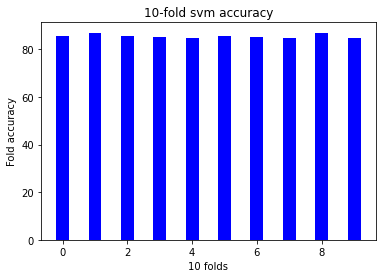

In [27]:
text_clf_SVM = Pipeline([
  ('vect', CountVectorizer(min_df=15,ngram_range=(1,2))),
  ('tfidf', TfidfTransformer()),
  ('clf', SVC()),
])
text_clf_SVM.fit(x_train, y_train)

predicted_SVM = text_clf_SVM.predict(x_test)

scores = cross_val_score(text_clf_SVM, x_train, y_train, cv = cv)
print("10-Folds Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#Plot K folds accuracy
plt.bar(np.arange(10), scores*100, color ='blue',width = 0.4) 
plt.xlabel("10 folds")
plt.ylabel("Fold accuracy")
plt.title("10-fold svm accuracy")
plt.show()

Evaluation using validation dataset

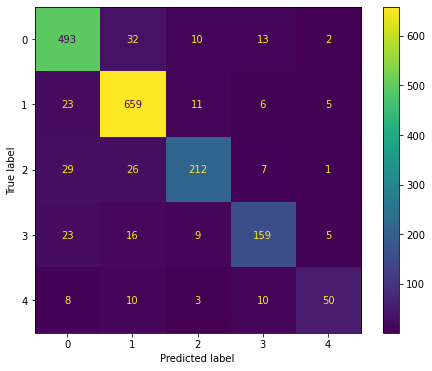

              precision    recall  f1-score   support

     sadness       0.86      0.90      0.88       550
         joy       0.89      0.94      0.91       704
       anger       0.87      0.77      0.82       275
        fear       0.82      0.75      0.78       212
    surprise       0.79      0.62      0.69        81

    accuracy                           0.86      1822
   macro avg       0.84      0.79      0.82      1822
weighted avg       0.86      0.86      0.86      1822



In [28]:
predicted_SVM2 = text_clf_SVM.predict(x_val)
cm = confusion_matrix(y_val,predicted_SVM2)
fig, ax = plt.subplots(figsize=(8, 6))
target_names = list(labels_emo_dict.values())

ConfusionMatrixDisplay.from_predictions( y_val, predicted_SVM2, labels=text_clf_SVM['clf'].classes_, ax=ax, colorbar=True)
plt.show()

labels_emo_dict
print(classification_report(y_val, predicted_SVM2, target_names=target_names))

#### Naive Bayes

10-Folds Accuracy: 0.82 (+/- 0.02)


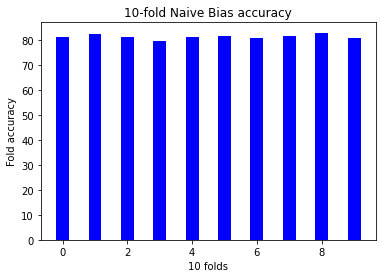

In [29]:
text_clf_NB = Pipeline([
    ('vect', CountVectorizer(min_df=20,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
text_clf_NB.fit(x_train, y_train)

predicted_NB = text_clf_NB.predict(x_test)


scores = cross_val_score(text_clf_NB, x_train, y_train, cv = cv)
print("10-Folds Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#Plot K folds accuracy
plt.bar(np.arange(10), scores*100, color ='blue',width = 0.4) 
plt.xlabel("10 folds")
plt.ylabel("Fold accuracy")
plt.title("10-fold Naive Bias accuracy")
plt.show()

**Evaluation using validation dataset**

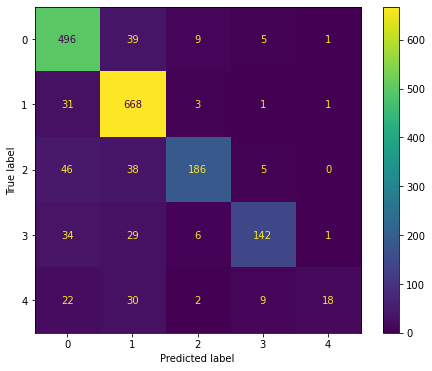

              precision    recall  f1-score   support

     sadness       0.79      0.90      0.84       550
         joy       0.83      0.95      0.89       704
       anger       0.90      0.68      0.77       275
        fear       0.88      0.67      0.76       212
    surprise       0.86      0.22      0.35        81

    accuracy                           0.83      1822
   macro avg       0.85      0.68      0.72      1822
weighted avg       0.84      0.83      0.82      1822



In [30]:
predicted_NB2 = text_clf_NB.predict(x_val)
cm = confusion_matrix(y_val,predicted_NB2)
fig, ax = plt.subplots(figsize=(8, 6))
target_names = list(labels_emo_dict.values())

ConfusionMatrixDisplay.from_predictions( y_val, predicted_NB2, labels=text_clf_NB['clf'].classes_, ax=ax, colorbar=True)
plt.show()

labels_emo_dict
print(classification_report(y_val, predicted_NB2, target_names=target_names))

#### Logestic Regression

10-Folds Accuracy: 0.85 (+/- 0.02)


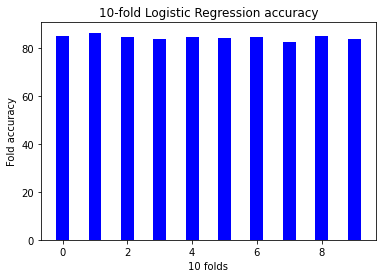

In [31]:
text_clf_LR = Pipeline([
    ('vect', CountVectorizer(min_df=20,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=1000,random_state=0)),
])
text_clf_LR.fit(x_train, y_train)

predicted_LR = text_clf_LR.predict(x_test)


scores = cross_val_score(text_clf_LR, x_train, y_train, cv = cv)
print("10-Folds Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#Plot K folds accuracy
plt.bar(np.arange(10), scores*100, color ='blue',width = 0.4) 
plt.xlabel("10 folds")
plt.ylabel("Fold accuracy")
plt.title("10-fold Logistic Regression accuracy")
plt.show()


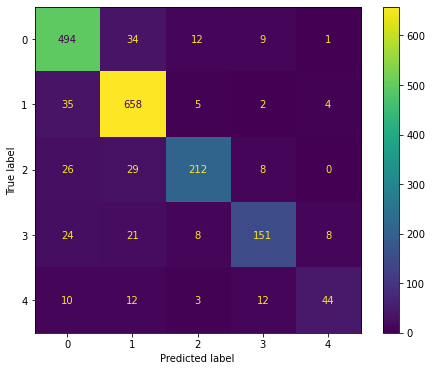

              precision    recall  f1-score   support

     sadness       0.84      0.90      0.87       550
         joy       0.87      0.93      0.90       704
       anger       0.88      0.77      0.82       275
        fear       0.83      0.71      0.77       212
    surprise       0.77      0.54      0.64        81

    accuracy                           0.86      1822
   macro avg       0.84      0.77      0.80      1822
weighted avg       0.85      0.86      0.85      1822



In [32]:
predicted_LR2 = text_clf_LR.predict(x_val)
cm = confusion_matrix(y_val,predicted_LR2)
fig, ax = plt.subplots(figsize=(8, 6))
target_names = list(labels_emo_dict.values())

ConfusionMatrixDisplay.from_predictions( y_val, predicted_LR2, labels=text_clf_LR['clf'].classes_, ax=ax, colorbar=True)
plt.show()

labels_emo_dict
print(classification_report(y_val, predicted_LR2, target_names=target_names))

### Champion Model Analysis

In [33]:
emotion_classifer = text_clf_SVM

In [34]:
labels_emo_dict

{0: 'sadness', 1: 'joy', 2: 'anger', 3: 'fear', 4: 'surprise'}

In [35]:
text_clf_SVM['clf'].classes_

array([0, 1, 2, 3, 4], dtype=int64)

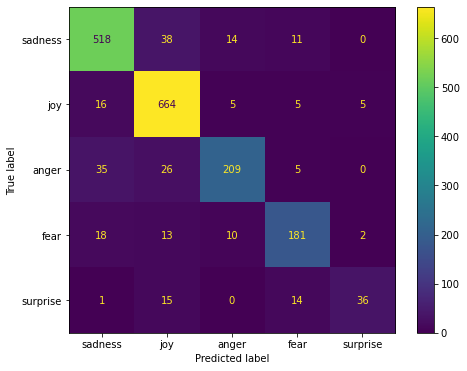

              precision    recall  f1-score   support

     sadness       0.88      0.89      0.89       581
         joy       0.88      0.96      0.92       695
       anger       0.88      0.76      0.81       275
        fear       0.84      0.81      0.82       224
    surprise       0.84      0.55      0.66        66

    accuracy                           0.87      1841
   macro avg       0.86      0.79      0.82      1841
weighted avg       0.87      0.87      0.87      1841



In [36]:
cm = confusion_matrix(y_test,predicted_SVM)
fig, ax = plt.subplots(figsize=(8, 6))
target_names = list(labels_emo_dict.values())

ConfusionMatrixDisplay.from_predictions( y_test, predicted_SVM, labels=text_clf_SVM['clf'].classes_,display_labels=target_names, ax=ax, colorbar=True)
plt.show()

labels_emo_dict
print(classification_report(y_test, predicted_SVM, target_names=target_names))

**Visualizing wrong predictions**

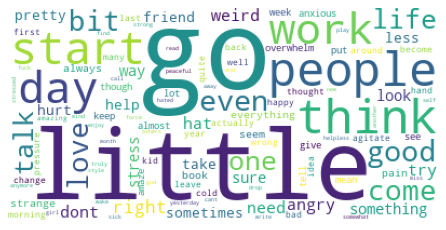

In [37]:
#Getting wrong predicitons
wrong_pred_indices = [i for i in range(len(y_test.values)) if y_test.values[i] != predicted_SVM[i]]
wrong_pred_df = Emotion_test.iloc[wrong_pred_indices,:].copy()
# display(wrong_pred_df)
wrong_pred = str(wrong_pred_df['cleantext'].str.cat(sep=' '))

#displaying the wrong predicitons words
wordcloud = WordCloud(background_color ='white',
                min_font_size = 5).generate(wrong_pred)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Visualizing wrong predicitions per emotion**

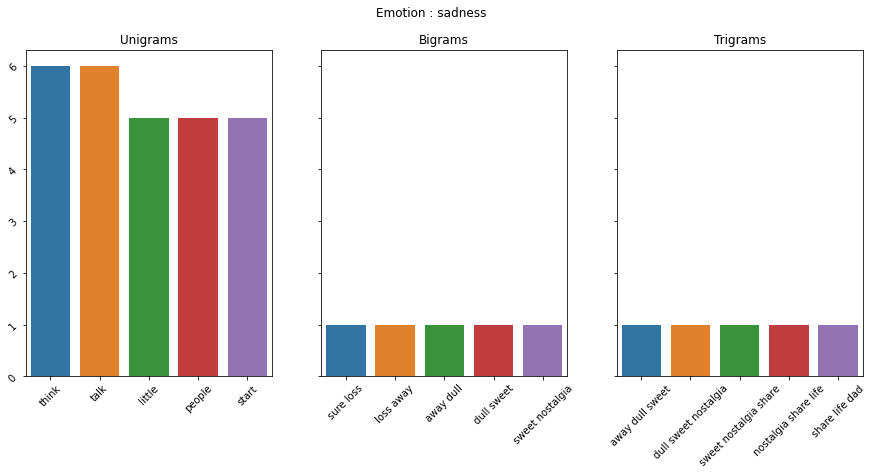

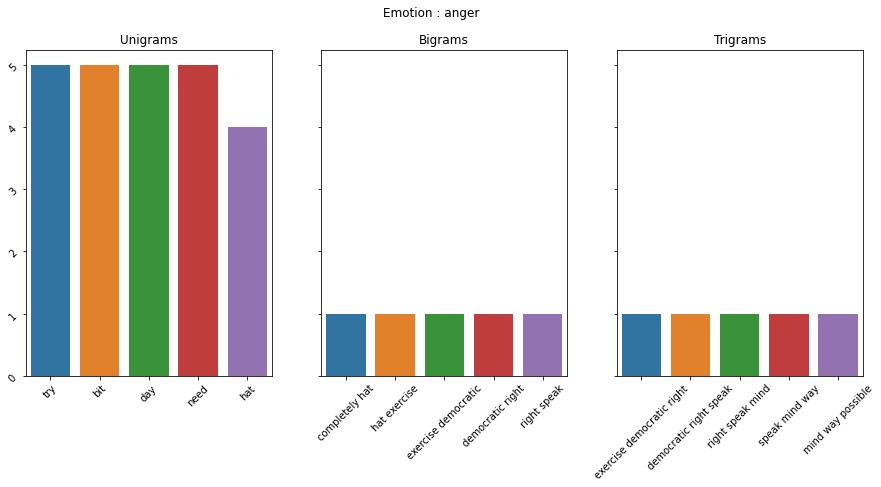

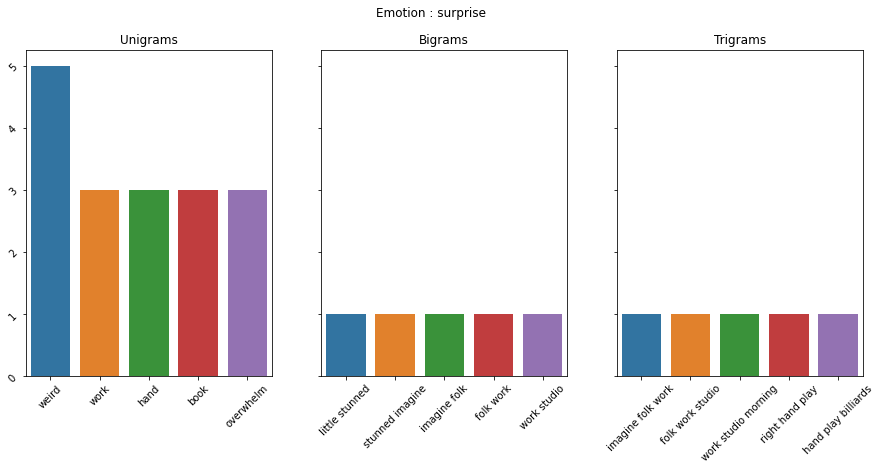

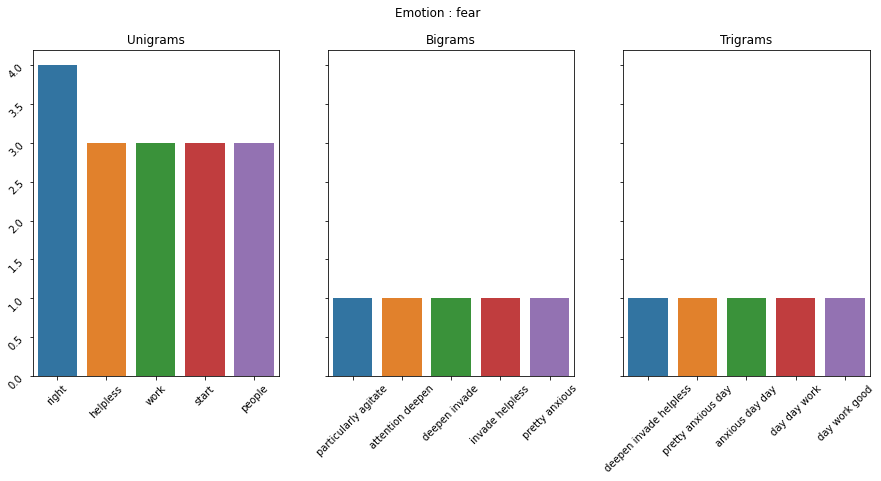

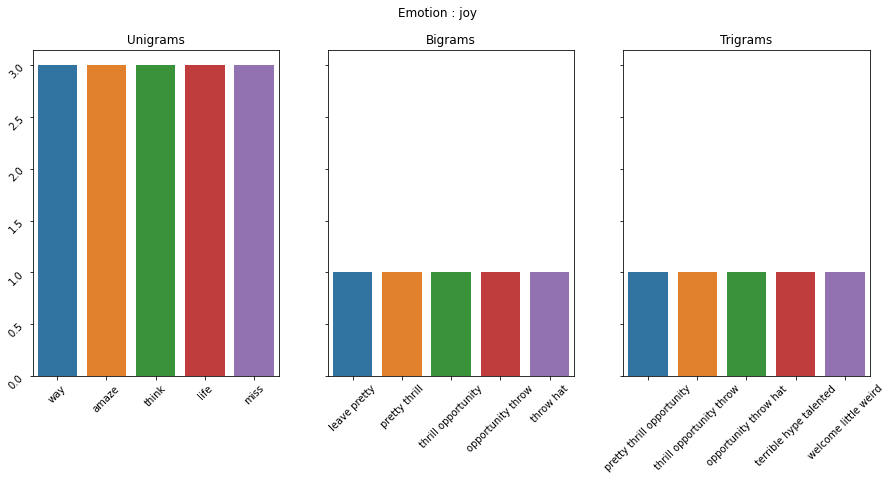

In [38]:
plot_emotions_ngrams(emotions_list,wrong_pred_df,'cleantext')

In [39]:
wrong_pred_df['predicted emotion'] = predicted_SVM[wrong_pred_indices]
wrong_pred_df['predicted emotion'] = wrong_pred_df['predicted emotion'].map(labels_emo_dict )

In [40]:
wrong_pred_df

,text,emotions,label,cleantext,predicted emotion
10,i don t feel particularly agitated,fear,3,particularly agitate,anger
12,i pay attention it deepens into a feeling of b...,fear,3,pay attention deepen invade helpless,sadness
20,im not sure the feeling of loss will ever go a...,sadness,0,sure loss ever go away may dull sweet nostalgi...,joy
34,i feel like i m defective or something for not...,sadness,0,defective something baby fever,joy
40,i feel if i completely hated things i d exerci...,anger,2,completely hat exercise democratic right speak...,sadness
...,...,...,...,...,...
1943,i didn t mean to get angry with you bommie i j...,sadness,0,mean angry bommie control hellip hat dara b,anger
1957,i am feeling amazing and seeing the difference,surprise,4,amazing see difference,joy
1959,i check you when you re sleeping feel your nos...,joy,1,check sleep nose toe sure hot cold,anger
1967,i see how it turns out i ll talk more about it...,joy,1,see turn talk right proud scar little sick thi...,fear


C:\Users\esraa\anaconda3\envs\NLP_PY_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emotions', ylabel='count'>

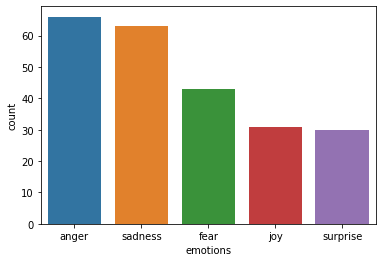

In [41]:
sns.countplot(wrong_pred_df['emotions'],order = wrong_pred_df['emotions'].value_counts(normalize=True).index)

In [42]:
display(wrong_pred_df.loc[wrong_pred_df['emotions'].isin(['anger'])])

,text,emotions,label,cleantext,predicted emotion
40,i feel if i completely hated things i d exerci...,anger,2,completely hat exercise democratic right speak...,sadness
67,i feel a bit stressed even though all the thin...,anger,2,bit stressed even though go fun,sadness
94,when a friend dropped a frog down my neck,anger,2,friend drop frog neck,sadness
98,i feel my heart is tortured by what i have done,anger,2,heart torture,fear
137,i actually feel agitated which led to a terrib...,anger,2,actually agitated lead terrible day yesterday ...,sadness
...,...,...,...,...,...
1856,i felt apprehensive in regards to the party of...,anger,2,apprehensive regard party oftentimes past men ...,fear
1876,i need a break or im feeling stressed out,anger,2,need break stress,sadness
1909,i feel appalled right now,anger,2,appalled right,joy
1913,i feel enraged by the amount of people partici...,anger,2,enrage amount people participate chance break ...,sadness


In [43]:
display(wrong_pred_df.loc[wrong_pred_df['emotions'].isin(['sadness'])])

,text,emotions,label,cleantext,predicted emotion
20,im not sure the feeling of loss will ever go a...,sadness,0,sure loss ever go away may dull sweet nostalgi...,joy
34,i feel like i m defective or something for not...,sadness,0,defective something baby fever,joy
56,i had every intention of doing more gardening ...,sadness,0,every intention gardening morning cool rotten,joy
97,i lay in bed feeling as though i were awaiting...,sadness,0,lay bed though await unwelcome visitor neverth...,joy
100,i feel needy but comfortable with it i feel vu...,sadness,0,needy comfortable vulnerable secure urge cum h...,fear
...,...,...,...,...,...
1796,i don t care if any of you read this but this ...,sadness,0,care read around guy hat,anger
1798,im okay with her getting married whirlwind sty...,sadness,0,okay married whirlwind style courthouse go ken...,joy
1805,i feel truly heartbroken that hyun joongs fans...,sadness,0,truly heartbroken hyun joongs fan hateful,anger
1927,ive been doing hour weeks and ill get paid for...,sadness,0,hour week ill pay extra start bit abused put l...,fear


In [44]:
anger_df = wrong_pred_df.loc[wrong_pred_df['emotions'].isin(['anger'])]
display(anger_df.loc[anger_df['predicted emotion'].isin(['sadness'])])
print(str(anger_df.loc[anger_df['predicted emotion'].isin(['sadness'])].shape))

,text,emotions,label,cleantext,predicted emotion
40,i feel if i completely hated things i d exerci...,anger,2,completely hat exercise democratic right speak...,sadness
67,i feel a bit stressed even though all the thin...,anger,2,bit stressed even though go fun,sadness
94,when a friend dropped a frog down my neck,anger,2,friend drop frog neck,sadness
137,i actually feel agitated which led to a terrib...,anger,2,actually agitated lead terrible day yesterday ...,sadness
193,i really dont like quinn because i feel like s...,anger,2,dont quinn end hurt barney hat lame ted robin ...,sadness
268,ive struggled mightily through today and even ...,anger,2,struggle mightily today even though cranky tir...,sadness
274,i feel like a lot of men are royally fucked up...,anger,2,lot men royally fuck go life wreak havoc end d...,sadness
378,i feel like the people that i myself love want...,anger,2,people love need talk connect anymore fuck men...,sadness
385,i feel insulted pete edochie responds to death,anger,2,insulted pete edochie respond death,sadness
396,i am most certainly an acquired taste but late...,anger,2,certainly acquire taste lately many around see...,sadness


(35, 5)


## َQuotes dataset

In [45]:
quotes_df = pd.read_json('./content/quotes.json')
display(quotes_df.head())
quotes_df.shape

,Quote,Author,Tags,Popularity,Category
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,life
1,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,happiness
2,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,love
3,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,life
4,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,truth


(48391, 5)

### Data Exploration

In [46]:
print(f'dataset na values count: {str(quotes_df.isna().sum().sum())}')
empty_cat = quotes_df[quotes_df['Category'] == ''].index
print(f'Quotes with empty Category: {str(len(empty_cat))}')

dataset na values count: 0
Quotes with empty Category: 1397


Dropping quotes that don't have a category

In [47]:
quotes_df.drop(quotes_df.index[empty_cat],inplace=True)
empty_cat = quotes_df[quotes_df['Category'] == ''].index
print(f'Quotes with empty Category: {str(len(empty_cat))}')

Quotes with empty Category: 0


In [48]:
quotes_df['Category'].value_counts()

inspiration     5066
life            3942
humor           3811
love            3751
philosophy      2504
success         2175
hope            2123
quotes          1181
positive        1130
wisdom          1113
purpose         1095
truth           1088
relationship    1088
mind            1071
books           1065
soul            1058
writing         1058
happiness       1057
knowledge       1052
arts            1043
romance         1025
faith           1024
death           1022
education       1005
god              994
poetry           971
funny            957
religion         943
science          893
friendship       655
motivation        34
Name: Category, dtype: int64

### Data visualization

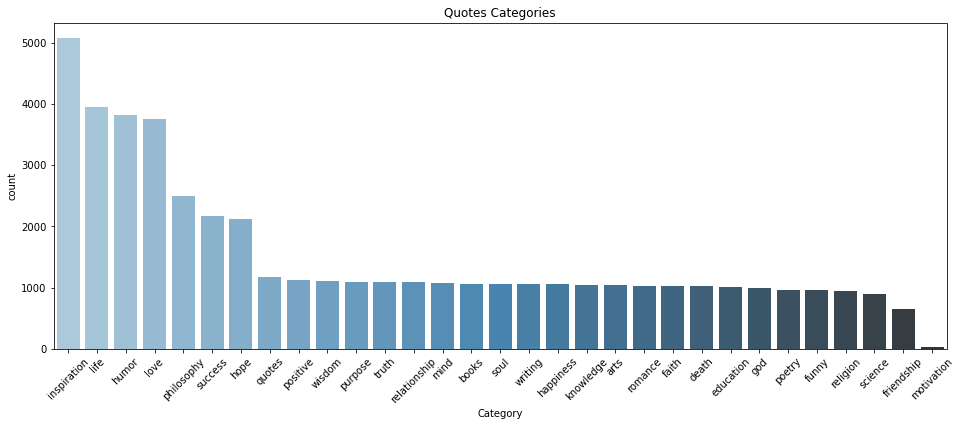

In [49]:
plt.figure(figsize = (16,6), facecolor = None)
fig = sns.countplot(x=quotes_df['Category'],order = quotes_df['Category'].value_counts(normalize=True).index,palette="Blues_d").set(title='Quotes Categories')
plt.xticks(rotation=45)
plt.show()

Checking authors with most popular quotes

In [50]:
#Now We Calculate the Popularity of Author that is most in all
popular_authors = quotes_df.groupby('Author')['Popularity'].mean()
popular_authors
display(popular_authors.sort_values(ascending=False).head())
print(f'The number of authors is: { len(popular_authors.sort_values(ascending=False)) }')

Author
William W. Purkey                                                                    0.100056
Narcotics Anonymous                                                                  0.054046
André Gide,  Autumn Leaves                                                           0.047625
Eleanor Roosevelt,  This is My Story                                                 0.046112
Martin Luther King Jr.,  A Testament of Hope: The Essential Writings and Speeches    0.041113
Name: Popularity, dtype: float64

The number of authors is: 13635


Checking the authors with biggest number of quotes

In [51]:
popular_authors = quotes_df.groupby('Author')['Author'].count().nlargest(10)
popular_authors

Author
Beryl Dov                                                                              3321
Jarod Kintz,  This Book is Not FOR SALE                                                1932
Debasish Mridha                                                                        1096
Jarod Kintz,  Love quotes for the ages. Specifically ages 18-81.                        266
Steve Maraboli,  Unapologetically You: Reflections on Life and the Human Experience     250
Steve Maraboli,  Life, the Truth, and Being Free                                        246
C. JoyBell C.                                                                           187
Criss Jami,  Killosophy                                                                 157
Shannon L. Alder                                                                        151
Robert M. Drake                                                                         147
Name: Author, dtype: int64

Selecting a few records to reduce dataset size

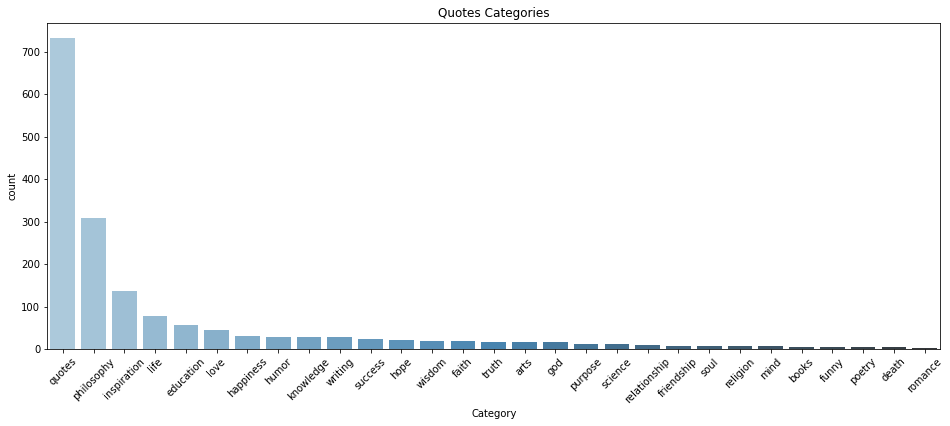

In [52]:
popular_authors_lst=['C. JoyBell C.','Criss Jami,  Killosophy','Debasish Mridha','Wilma Rudolph','John D. Rockefeller','Dr. Seuss','Oscar Wilde','Ernest Hemingway','Juliana Hatfield','Buddha','Bertrand Russell']
filtered_quotes_df = quotes_df.loc[quotes_df['Author'].isin(popular_authors_lst)].copy()

plt.figure(figsize = (16,6), facecolor = None)
fig = sns.countplot(x=filtered_quotes_df['Category'],order = filtered_quotes_df['Category'].value_counts(normalize=True).index,palette="Blues_d").set(title='Quotes Categories')
plt.xticks(rotation=45)
plt.show()


### Data preparation

In [53]:
filtered_quotes_df["cleanQuote"] = filtered_quotes_df["Quote"].apply(lambda text: prepare_text(text))
display(filtered_quotes_df.head())
len(filtered_quotes_df)

,Quote,Author,Tags,Popularity,Category,cleanQuote
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,life,Dont cry smile happened
1,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,happiness,Dont cry smile happened
5,Be yourself; everyone else is already taken.,Oscar Wilde,"[attributed-no-source, be-yourself, honesty, i...",0.113223,inspiration,Be everyone else already taken
13,You know you're in love when you can't fall as...,Dr. Seuss,"[attributed-no-source, dreams, love, reality, ...",0.095724,love,You love cant fall asleep reality finally good...
38,To live is the rarest thing in the world. Most...,Oscar Wilde,[life ],0.058033,life,To rare world Most people exist


1694

Predicting every quotes dominant emotion using emotion classifier

In [54]:
filtered_quotes_df["emotion"] = text_clf_SVM.predict(filtered_quotes_df["cleanQuote"])

### Models

In [55]:
def draw_cluster_scatter(features,pred_clust):
    clusters_names = set(pred_clust)
    plt.figure(figsize=(6,6))
    #draw the Scatter
    X_tSne = TSNE(n_components=2).fit_transform(features)
    X_tSne = pd.concat([pd.DataFrame(X_tSne).astype(float), pd.DataFrame(pred_clust).astype(int)], axis=1 , ignore_index=True)

    for cluster_name in clusters_names:
        plt.scatter(X_tSne[X_tSne[2]==cluster_name][0] , X_tSne[X_tSne[2] == cluster_name][1], s=10, label = f'cluster {cluster_name}')
    plt.xlabel('X Value')
    plt.ylabel('y Value')
    plt.legend()
    plt.show()

#### K-Means

Selecting the best number of clusters using tf-idf feature transformation

In [56]:
tfidf_vect = TfidfVectorizer(min_df=30,ngram_range=(1,2))
part_txt_trans = tfidf_vect.fit_transform(filtered_quotes_df['cleanQuote'])

max_k=19
cluster_num = []
#WCSS
wcss_err = []
#silhouette
sil_err = []

for i in range(2, max_k):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(part_txt_trans)
    cluster_num.append(i)
    sil_err.append(silhouette_score(part_txt_trans, kmeans.labels_))
    wcss_err.append( kmeans.inertia_ )


Text(0, 0.5, 'silhouette')

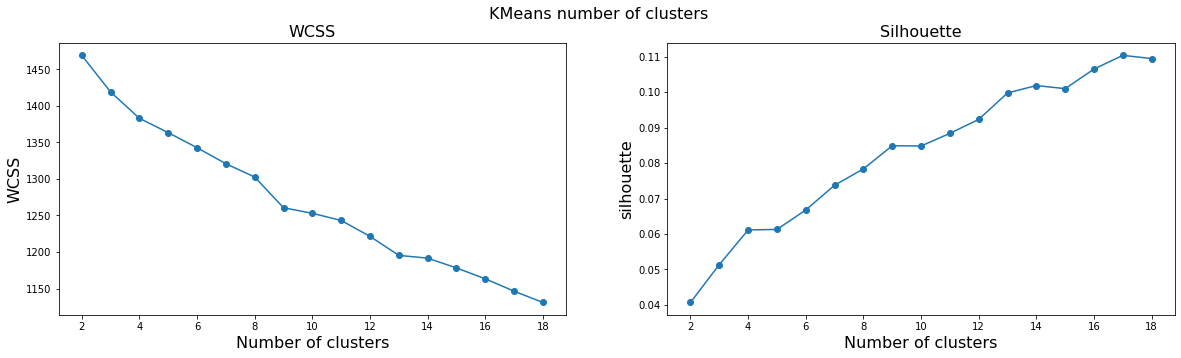

In [57]:
#plot KMeans wcss and sil scores
fig, ax = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('KMeans number of clusters', fontsize=16)
#WCSS score
ax[0].plot( cluster_num, wcss_err, marker = "o" )
ax[0].set_title("WCSS", fontsize=16)
ax[0].set_xlabel("Number of clusters", fontsize=16)
ax[0].set_ylabel("WCSS", fontsize=16)

#silhouette score
ax[1].plot(cluster_num, sil_err, marker = "o")
ax[1].set_title("Silhouette", fontsize=16)
ax[1].set_xlabel('Number of clusters', fontsize=16)
ax[1].set_ylabel('silhouette', fontsize=16)

Creating k-means using the best number of clusters obtained from graphs

In [58]:
num_clusters = 17
cluster_col_name = 'cleanQuote'
text_clus_KMeans = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=50,ngram_range=(1,2))),
    ('estimator', KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)),
])
text_clus_KMeans.fit(filtered_quotes_df[cluster_col_name])

#evaluation
#coherence
print(f"Coherence score: {text_clus_KMeans['estimator'].inertia_}")
#silhoutte
parts_txt_trans = text_clus_KMeans['tfidf'].transform(filtered_quotes_df[cluster_col_name].values)
print(f"Silhouette score: {silhouette_score(parts_txt_trans, text_clus_KMeans['estimator'].labels_)}")

Coherence score: 745.5850675344275
Silhouette score: 0.25736400899061385


In [59]:
filtered_quotes_df['cluster label'] = text_clus_KMeans['estimator'].labels_

visualizing resulted clusters

C:\Users\esraa\anaconda3\envs\NLP_PY_3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\esraa\anaconda3\envs\NLP_PY_3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


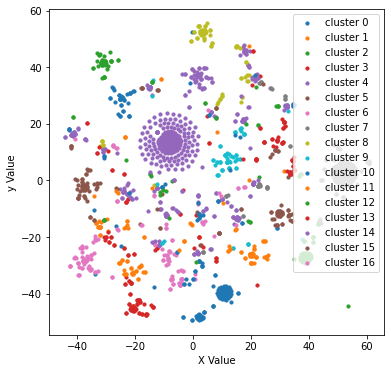

In [62]:
draw_cluster_scatter(parts_txt_trans,text_clus_KMeans['estimator'].labels_)

# Chatbot development

## Chatbot configuration

In [63]:
bot_responses={
    'ask_username':['What should I call you?'],
    'ask_age':['How old are you?'],
    'ask_reading':['On a scale from 1 to 5, 1 being lowest and 5 highest. How much do you like reading?'],
    'starting_conv':['How was your day today?','What do you want to talk about?','Anything interesting happened with you lately?','How\'s life?','Anything you want to share with me?','Any interesting events you wanna tell me about?'],
    'ask_about':['What about {0}?','Tell me more about {0}.'],
    'quote_reponse':['Just like {0} Used to say "{1}"','This reminds of what {0} said: {1}','{0} once said {1}']
}
intents_dict = {
    'greeting':{
        'key_words':['hello','hi','welcome'],
        'sentences':[],
        'responses':['Hi there!'],
        'patterns':[]
    },
    'fallback':{
        'key_words':[],
        'sentences':[],
        'responses':['I\'m sorry, I don\'t understand what you mean.','I dont quite understand. Could you repeat that?'],
        'patterns':[]
    },
    'gratitude':{
        'key_words':[],
        'sentences':['thank you','grateful for your help','thanks'],
        'responses':['Glad I could help','It\'s my pleasure'],
        'patterns':[]
    },
    'goodbye':{
        'key_words':['bye','quit'],
        'sentences':['bye bye','It was nice talking to you','see you'],
        'responses':['See you later.','bye bye',"I hope you enjoyed our talk! see you later."],
        'patterns':[]
    },
    'talking':{
        'key_words':[],
        'sentences':[],
        'responses':['What about {0}?','Tell me more about {0}.'],
        'patterns':[]
    }
}

default_user_profile={
    'name':'User',
    'reading':5
}

In [64]:
emotional_responses = pd.read_csv("./content/chatbot-Responses.csv")

## Chatbot coversational methods

Constructing regex using keywords

In [65]:
#iterate on intents dictionary
for intent in intents_dict:
    word_syn=[]
    for key_word in intents_dict[intent]['key_words']:
        for syn_set in wordnet.synsets(key_word):
            for lemma in syn_set.lemmas():
                lem_name = re.sub('[^a-zA-Z0-9 \n\.]', ' ', lemma.name())
                word_syn.append(lem_name)
    if len(word_syn) > 0:
        for synonym in set(word_syn):
            intents_dict[intent]['patterns'].append('.*\\b'+synonym+'\\b.*')
            

intents_regex_dict={}
for intent in intents_dict:
    all_aptterns = intents_dict[intent]['patterns']+intents_dict[intent]['sentences']
    if len(all_aptterns)>0:
        intents_regex_dict[intent]=re.compile('|'.join(all_aptterns))


In [66]:

def get_intent_response(intent_key,intent_dict):
    #todo: remove this hardcoded condition
    res = ''
    if intent_key != "talking":
        i = randrange(len(intent_dict[intent_key]['responses']))
        res = intent_dict[intent_key]['responses'][i]
    return res

def get_random_string(string_list):
    i = randrange(len(string_list))
    selected_str = string_list[i]
    return selected_str

def get_entities(user_input):
    ent_lst=[]
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(user_input)
    print('ner recognized entities:'+str(doc.ents))
    for ent in doc.ents:
        ent_lst.append(ent.text)
    return ent_lst

def format_bot_response(response):
    return ('Eve-Bot: '+str(response))

def get_emotion_response(user_input):
    #get predicted user emotion
    clean_user_input = prepare_text(user_input)
    predicted_emotion = emotion_classifer.predict([clean_user_input])
    print(f'Detected emotion: {labels_emo_dict[predicted_emotion[0]]}')
    #get response from dataset based on user emotion
    res_lst = emotional_responses.loc[emotional_responses.emotion==labels_emo_dict[predicted_emotion[0]]]['response'].values
    #if no response is found then go with joy as default responses
    if len(res_lst)==0:
        res_lst = emotional_responses.loc[emotional_responses.emotion=='joy']['response'].values
    return get_random_string(res_lst)

def get_similar_quote(user_input):
    clean_user_input = prepare_text(user_input)
    
    predicted_emotion = emotion_classifer.predict([clean_user_input])
    print(f'Detected emotion: {labels_emo_dict[predicted_emotion[0]]}')
    
    cluster_num = text_clus_KMeans.predict([clean_user_input])
    
    res_lst = filtered_quotes_df.loc[filtered_quotes_df['cluster label']==cluster_num[0]]
    res_lst = res_lst.loc[res_lst['emotion']==predicted_emotion[0]]
    #picking out any quote from list
    if len(df.index) == 0:
        #if no rows are found then pick any random quote
        res_row = filtered_quotes_df.sample()
    else:
        res_row = res_lst.sample()
    print(res_row['Author'].values[0])
    return get_random_string(bot_responses['quote_reponse']).format(res_row['Author'].values[0],res_row['Quote'].values[0])
    
        

In [67]:
get_similar_quote("I am feeling very happy today")

Detected emotion: joy
Debasish Mridha


'Debasish Mridha once said Manifestation is a process by which we transform seemingly unrealizable imaginations to reality.'

In [68]:
def print_bot_response_ui(txt_box,bot_response):
    txt_box.insert(END, "\n"+format_bot_response(bot_response))
    
def activate_reactive_bot_mode(intent_key,user_input,text_box):
    new_intent=intent_key
    if intent_key=='greeting':
        #get basic user info
        if 'name' not in user_profile.keys():
            if listOfGlobals['current_question'] =='name':
                user_profile['name'] = user_input
                listOfGlobals['current_question']=''
            else:
                listOfGlobals['current_question']='name'
                print_bot_response_ui(text_box,get_random_string(bot_responses['ask_username']))
                return new_intent 
            
        if 'reading' not in user_profile.keys():
            if listOfGlobals['current_question']=='reading':
                user_profile['reading'] = int(user_input)
                listOfGlobals['current_question']=''
            else:
                listOfGlobals['current_question']='reading'
                print_bot_response_ui(text_box,get_random_string(bot_responses['ask_reading']))
                return new_intent
            
        new_intent = 'talking'
        #start conversing with user
        print_bot_response_ui(text_box,get_random_string(bot_responses['starting_conv']))
        return new_intent
    
    if intent_key=='talking':
        listOfGlobals['user_story'].append(user_input)
        #start a mini conversation to collect enough info for emotion classification
        for ent in get_entities(user_input):
            if ent not in listOfGlobals['entities']:
                listOfGlobals['entities'].append(ent)
                print(f"Current NER Entites: {listOfGlobals['entities']}")

        if len(listOfGlobals['entities'])>0:
            ent = listOfGlobals['entities'].pop()
            print_bot_response_ui(text_box,get_random_string(bot_responses['ask_about']).format(ent))
            return new_intent
        
        if len(listOfGlobals['entities']) == 0:
            print(f"Current user story: {listOfGlobals['user_story']}")
            if len(listOfGlobals['user_story']) <= 1:
                print_bot_response_ui(text_box,get_random_string(bot_responses['starting_conv']))
                return new_intent
            #decide on whether the user will get a quote or emotion response
            if user_profile['reading'] == 0:
                key = 'Response'
            else:
                # random key
                weight_dict = {"Response": 50,"Quote": 50 * user_profile['reading']}
                key = random.choice(list(weight_dict))
            
            if key == "Response":
                print_bot_response_ui(text_box,get_emotion_response(" ".join(listOfGlobals['user_story'])))
                listOfGlobals['user_story'] = []
            else:
                print_bot_response_ui(text_box,get_similar_quote(" ".join(listOfGlobals['user_story'])))
                listOfGlobals['user_story'] = []
          
    return new_intent

## Chatbot UI

In [69]:
def process_user_input(txt_box):
    print('--------------------------------------------------------')
    print('process_user_input enter: State is:'+listOfGlobals['matched_intent'])
    user_msg = "You -> "+e.get()
    txt_box.insert(END, "\n"+user_msg)
    user_input = e.get().lower()
    for intent,pattern in intents_regex_dict.items():
        # Using the regular expression search function to look for keywords in user input
        if re.search(pattern, user_input): 
            # if a keyword matches, select the corresponding intent from the keywords_dict dictionary
            listOfGlobals['matched_intent']=intent  
    
    print('process_user_input : Update State is:'+listOfGlobals['matched_intent'])
    
    # The chatbot prints the response that matches the selected intent
    if listOfGlobals['matched_intent'] != 'talking':
        bot_response = format_bot_response(get_intent_response(listOfGlobals['matched_intent'],intents_dict))
        txt_box.insert(END, "\n"+bot_response)
    
    listOfGlobals['matched_intent'] = activate_reactive_bot_mode(listOfGlobals['matched_intent'],user_input,txt_box)
    print('process_user_input exit: State is:'+listOfGlobals['matched_intent'])
    print('--------------------------------------------------------')
    e.delete(0, END)

In [70]:
from tkinter import *

#a workaround to avoid profile questions
# user_profile=default_user_profile
user_profile={}

root = Tk()
root.title("Eve-Chatbot")

listOfGlobals = globals()
listOfGlobals['matched_intent'] = ''
listOfGlobals['current_question'] = ''
listOfGlobals['entities'] = []
listOfGlobals['user_story'] = []

root.bind("<Return>", (lambda event: process_user_input(txt)))
txt = Text(root)
txt.grid(row=0, column=0, columnspan=2)
e = Entry(root, width=100)
e.grid(row=1, column=0)
send = Button(root, text="Send", command=lambda: process_user_input(txt)).grid(row=1, column=1)

print_bot_response_ui(txt,"Welcome. I'm Eve chatbot.")

root.mainloop()